In [1]:
from UTILITY_quickstart import *

importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline.yml")

In [2]:
csrTF = True


bunchCount = importedDefaultSettings["bunchCount"]

tao = initializeTao(
    inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"],
    
    csrTF = csrTF,
    numMacroParticles=1e5,
    scratchPath = "/tmp",
    randomizeFileNames = True
)

setLattice(tao, **importedDefaultSettings)
launchTwissCorrection(tao)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 100000.0
Beam created, written to /tmp/beams/activeBeamFile_732816584251689436.h5, and reinit to tao
No evalElement provided. Assuming golden lattice PR10571
Optimization Results:
Optimal Parameters: [28.77872199 13.3970811  23.51278494 16.8307956 ]
Objective Function Value at Optimal Parameters: 9.505958617749993e-12
Number of Iterations: 260
Converged: True


In [3]:
trackStart = "ENDBC14E"
trackEnd = "PR15944"

trackBeam(tao, trackEnd = trackStart, **importedDefaultSettings)

PStart = getBeamAtElement(tao, trackStart)

makeBeamActiveBeamFile( PStart, tao = tao )

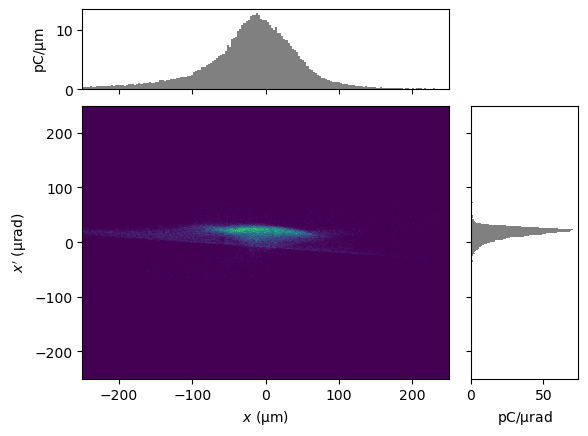

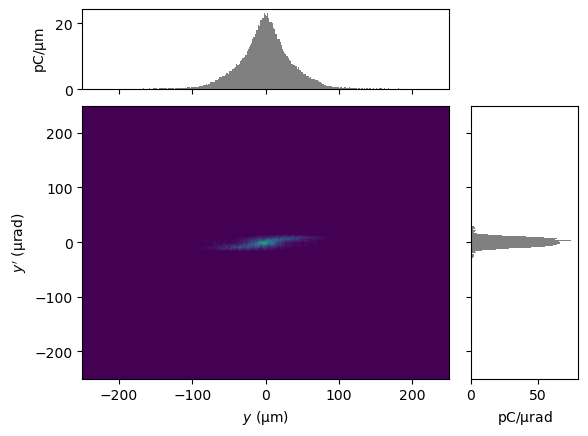

In [11]:
display(plotMod(PStart, 'x', 'xp', bins=1000, xlim = (-0.25e-3, 0.25e-3), ylim = (-0.25e-3,0.25e-3)))
display(plotMod(PStart, 'y', 'yp', bins=1000, xlim = (-0.25e-3, 0.25e-3), ylim = (-0.25e-3,0.25e-3)))
plt.clf()

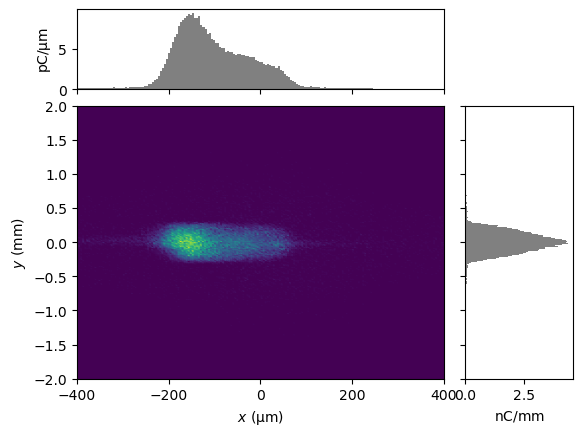

{'PDrive_median_x': -0.00011677719050929603,
 'PDrive_median_y': 3.9434126695773667e-07,
 'PDrive_median_xp': -1.3187920272931648e-05,
 'PDrive_median_yp': -2.046920164715726e-08,
 'PDrive_sigmaSI90_x': 8.605541580095072e-05,
 'PDrive_sigmaSI90_y': 0.00014585914966968737,
 'PDrive_sigmaSI90_z': 3.810202671192991e-05,
 'PDrive_sigmaSI90_xp': 1.2131615278475478e-05,
 'PDrive_sigmaSI90_yp': 5.649180385443491e-06,
 'PDrive_emitSI90_x': 8.496257049558222e-06,
 'PDrive_emitSI90_y': 3.3247387073357067e-06,
 'PDrive_norm_emit_x': 5.598584889982713e-06,
 'PDrive_norm_emit_y': 1.786283141263608e-06,
 'PDrive_charge_nC': 1.5996480000000006}

<Figure size 640x480 with 0 Axes>

In [4]:
trackBeam(tao, trackStart = trackStart, trackEnd = trackEnd, **importedDefaultSettings)

P = getBeamAtElement(tao, trackEnd)
display(plotMod(P, 'x', 'y', bins=300, xlim = (-0.4e-3, 0.4e-3), ylim = (-2e-3,2e-3)))
plt.clf()

getBeamSpecs(P)

In [5]:
data = []
quadStep = 5
allQuadSettings = np.arange(-60, 0 + quadStep, quadStep)

for quadSetting in allQuadSettings:
    setQuadkG(tao, "Q14901", quadSetting)


    transferMatrix = getMatrix(tao, trackStart, trackEnd)

    trackBeam(tao, trackStart = trackStart, trackEnd = trackEnd, **importedDefaultSettings)

    P = getBeamAtElement(tao, trackEnd)
    
    spotSize = smallestIntervalImpliedSigma(P.x)
    #spotSize = P["sigma_x"]

    data.append(
        {
            "quadSetting" : quadSetting,
            # "R11" : transferMatrix[0][0],
            # "R12" : transferMatrix[0][1],
            # "sigma" : spotSize,
            "beam" : P,
            "matrix" : transferMatrix
        }
    )

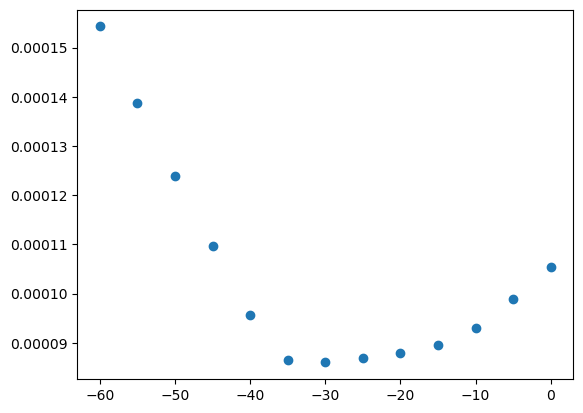

In [6]:
plt.clf() 
plt.scatter(
    [i["quadSetting"] for i in data],
    [smallestIntervalImpliedSigma(i["beam"]["x"]) for i in data]
)

In [7]:
import pickle


with open('data.pickle', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('data.pickle', 'rb') as handle:
    b = pickle.load(handle)

print(data == b)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [8]:
data[0]

{'quadSetting': -60,
 'beam': <ParticleGroup with 99978 particles at 0x178d83fd0>,
 'matrix': array([[-1.54822705e+00, -8.48094355e+00,  1.01662202e-24,
         -3.08923325e-24,  8.43312955e-22,  6.65381432e-17],
        [-6.85465774e-02, -8.92053534e-01,  1.78420807e-25,
         -5.42171503e-25, -2.30154561e-22, -3.46011622e-17],
        [-1.71445122e-24, -5.03250692e-24,  1.10967696e+00,
         -1.00103592e+01,  3.08285461e-36,  4.32836041e-31],
        [ 1.00329698e-25,  2.94502342e-25,  5.55375416e-02,
          2.19713509e-01, -1.64265566e-37, -2.41160645e-32],
        [-7.27646022e-17, -4.41625586e-16,  6.35824790e-32,
         -1.83129601e-31,  1.00000000e+00,  9.54633983e-07],
        [ 1.59686004e-28,  9.97938191e-28, -1.44064189e-43,
          4.08921089e-43, -3.34575404e-12,  7.99761757e-01]])}

In [9]:
b[0]

{'quadSetting': -60,
 'beam': <ParticleGroup with 99978 particles at 0x117be8d50>,
 'matrix': array([[-1.54822705e+00, -8.48094355e+00,  1.01662202e-24,
         -3.08923325e-24,  8.43312955e-22,  6.65381432e-17],
        [-6.85465774e-02, -8.92053534e-01,  1.78420807e-25,
         -5.42171503e-25, -2.30154561e-22, -3.46011622e-17],
        [-1.71445122e-24, -5.03250692e-24,  1.10967696e+00,
         -1.00103592e+01,  3.08285461e-36,  4.32836041e-31],
        [ 1.00329698e-25,  2.94502342e-25,  5.55375416e-02,
          2.19713509e-01, -1.64265566e-37, -2.41160645e-32],
        [-7.27646022e-17, -4.41625586e-16,  6.35824790e-32,
         -1.83129601e-31,  1.00000000e+00,  9.54633983e-07],
        [ 1.59686004e-28,  9.97938191e-28, -1.44064189e-43,
          4.08921089e-43, -3.34575404e-12,  7.99761757e-01]])}